<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/MPLNS_20_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pylab as pl

In [4]:
#feature di input
#4 osservazioni con 3 feature booleane
X = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])

(-0.5, 2.5, 3.5, -0.5)

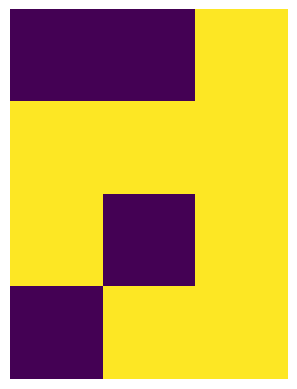

In [6]:
pl.imshow(X)
pl.axis('off');

In [7]:
#output 4 predizioni, 4x1
y = np.array([[0,1,1,0]]).T

In [8]:
#facciamo un single layer perceptron
#userò un layer di 3 neuroni (uno per feature)

#activation function
def sigmoid(x):
  return 1/(1+np.exp(-x))

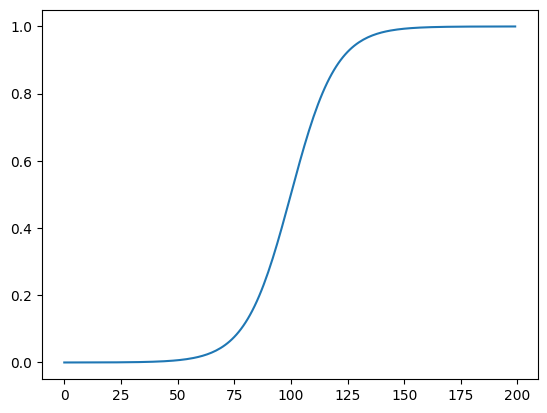

In [10]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))